In [901]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [902]:
df = pd.read_csv("Train_Data.csv")
dt = pd.read_csv("Test_Data.csv")
ds = pd.read_csv("Sample_Submission.csv")

In [903]:
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,normal
86841,0,tcp,http,SF,368,1725,0,0,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,normal
86842,28,tcp,ftp,SF,1483,4152,0,0,0,30,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,normal
86843,0,tcp,smtp,SF,1679,385,0,0,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,normal


In [904]:
dt

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,mtp,REJ,0,0,0,0,0,0,...,7,0.03,0.08,0.00,0.00,0.0,0.0,1.0,1.0,20
1,0,tcp,http,SF,199,1721,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,21
2,0,tcp,discard,S0,0,0,0,0,0,0,...,14,0.05,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18
3,0,tcp,telnet,S0,0,0,0,0,0,0,...,2,0.01,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18
4,0,tcp,exec,S0,0,0,0,0,0,0,...,16,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21707,0,tcp,http,SF,273,4367,0,0,0,0,...,255,1.00,0.00,0.03,0.01,0.0,0.0,0.0,0.0,21
21708,0,udp,domain_u,SF,45,45,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,18
21709,0,tcp,imap4,S0,0,0,0,0,0,0,...,10,0.04,0.08,0.00,0.00,1.0,1.0,0.0,0.0,20
21710,0,tcp,ftp_data,SF,29,0,0,0,0,0,...,45,0.47,0.07,0.47,0.04,0.0,0.0,0.0,0.0,21


In [905]:
df.wrongfragment.value_counts()

wrongfragment
0    86845
Name: count, dtype: int64

In [906]:
df.urgent.value_counts()

urgent
0    86843
2        1
1        1
Name: count, dtype: int64

In [907]:
df.numfailedlogins.value_counts()

numfailedlogins
0    86796
1       38
3        5
2        5
4        1
Name: count, dtype: int64

In [908]:
df.rootshell.value_counts()

rootshell
0    86728
1      117
Name: count, dtype: int64

In [909]:
df.attack.value_counts()

attack
normal     53847
neptune    32998
Name: count, dtype: int64

In [910]:
df.isguestlogin.value_counts()

isguestlogin
0    86145
1      700
Name: count, dtype: int64

In [911]:
df.ishostlogin.value_counts()

ishostlogin
0    86844
1        1
Name: count, dtype: int64

In [912]:
df = df.drop(["land", "wrongfragment", "urgent", "numfailedlogins", "rootshell", "numoutboundcmds", "ishostlogin", "isguestlogin"], axis=1)
dt = dt.drop(["land", "wrongfragment", "urgent", "numfailedlogins", "rootshell", "numoutboundcmds", "ishostlogin", "isguestlogin"], axis=1)

In [913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   hot                     86845 non-null  int64  
 7   loggedin                86845 non-null  int64  
 8   numcompromised          86845 non-null  int64  
 9   suattempted             86845 non-null  int64  
 10  numroot                 86845 non-null  int64  
 11  numfilecreations        86845 non-null  int64  
 12  numshells               86845 non-null  int64  
 13  numaccessfiles          86845 non-null  int64  
 14  count                   86845 non-null

In [914]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
hot                       0
loggedin                  0
numcompromised            0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate         0
dsthostsrvrerrorrate      0
lastflag                  0
attack                    0
dtype: int64

In [915]:
df.describe()

,duration,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,numroot,numfilecreations,numshells,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.144971,0.441142,0.320583,0.001267,0.356382,0.014370,0.000357,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,1.837958,0.496527,27.993474,0.048450,28.415210,0.528799,0.020072,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,77.000000,1.000000,7479.000000,2.000000,7468.000000,43.000000,2.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [916]:
numeries = df.select_dtypes(include=["int64", "float64"]).columns
categories = df.select_dtypes(include="object").columns

In [917]:
len(numeries)

31

In [918]:
# plt.figure(figsize=(20, 120))
# for (i,j) in zip(numeries, range(1, len(numeries)+1)):
#         plt.subplot(16, 2, j)
#         sns.boxplot(df[i])

In [919]:
categories = ['protocoltype', 'service', 'flag', "suattempted"]

In [920]:
numeries = ['duration', 'srcbytes', 'dstbytes', 'hot', 'loggedin', 'numcompromised', 'numroot', 'numfilecreations', 'numshells',
       'numaccessfiles', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag']

In [921]:
ul = df.dsthostsrvdiffhostrate.quantile(0.99)
ll = df.dsthostsrvdiffhostrate.quantile(0.00)
dff = df[(df["dsthostsrvdiffhostrate"] <= ul) & (df["dsthostsrvdiffhostrate"] >= ll)]
dff

,duration,protocoltype,service,flag,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,neptune
1,0,tcp,smtp,SF,1239,400,0,1,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,normal
2,0,tcp,http,SF,222,945,0,1,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,normal
3,0,tcp,http,SF,235,1380,0,1,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,1,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,normal
86841,0,tcp,http,SF,368,1725,0,1,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,normal
86842,28,tcp,ftp,SF,1483,4152,30,1,0,0,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,normal
86843,0,tcp,smtp,SF,1679,385,0,1,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,normal


In [922]:
# df["dsthostsrvdiffhostrate"] = np.where(df["dsthostsrvdiffhostrate"] >= ul,
#          ul,
#          np.where(df["dsthostsrvdiffhostrate"] <= ll,
#                   ll,
#                   df["dsthostsrvdiffhostrate"]))

C:\Users\91909\AppData\Local\Temp\ipykernel_4004\1095525807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff.dsthostsrvdiffhostrate)


<Axes: xlabel='dsthostsrvdiffhostrate', ylabel='Density'>

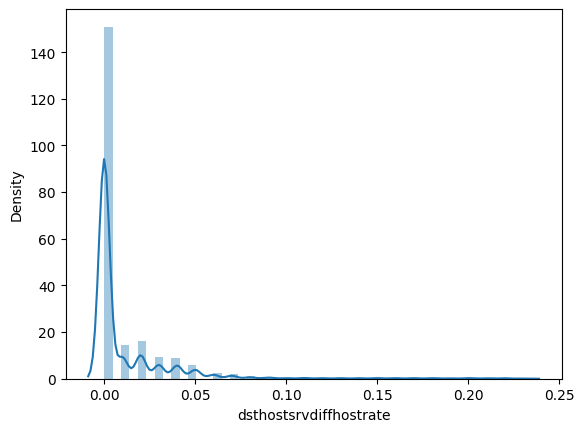

In [923]:
sns.distplot(dff.dsthostsrvdiffhostrate)

<Axes: xlabel='srvdiffhostrate', ylabel='Count'>

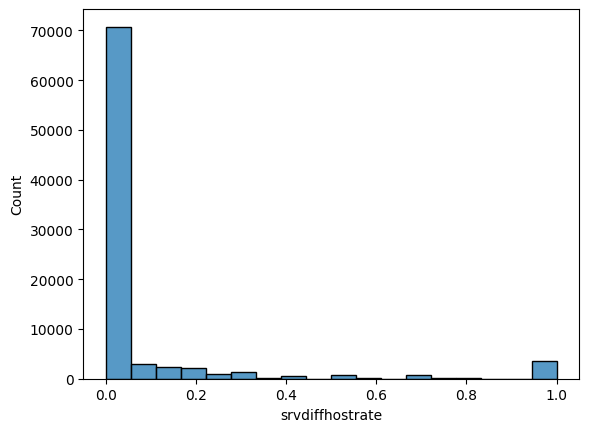

In [924]:
sns.histplot(df.srvdiffhostrate)

In [925]:
ul1 = df.srvdiffhostrate.quantile(0.99)
ll1 = df.srvdiffhostrate.quantile(0.01)

In [926]:
df1 = df[(df.srvdiffhostrate < 0.9)]

In [927]:
df.srvdiffhostrate > 0.9

0        False
1        False
2        False
3        False
4        False
         ...  
86840    False
86841    False
86842    False
86843    False
86844    False
Name: srvdiffhostrate, Length: 86845, dtype: bool

In [928]:
df.diffsrvrate.quantile(0.99)

0.75

In [929]:
df.diffsrvrate.quantile(0.01)

0.0

In [930]:
dfff = dff[(dff["diffsrvrate"] <= 0.75) & (dff["diffsrvrate"] >= 0.0)]
dfff

,duration,protocoltype,service,flag,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,neptune
1,0,tcp,smtp,SF,1239,400,0,1,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,normal
2,0,tcp,http,SF,222,945,0,1,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,normal
3,0,tcp,http,SF,235,1380,0,1,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,1,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,normal
86841,0,tcp,http,SF,368,1725,0,1,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,normal
86842,28,tcp,ftp,SF,1483,4152,30,1,0,0,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,normal
86843,0,tcp,smtp,SF,1679,385,0,1,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,normal


In [931]:
dfff = dfff.drop(["numcompromised", "numroot"], axis=1)
dt = dt.drop(["numcompromised", "numroot"], axis=1)

In [932]:
df.numroot.describe()

count    86845.000000
mean         0.356382
std         28.415210
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7468.000000
Name: numroot, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

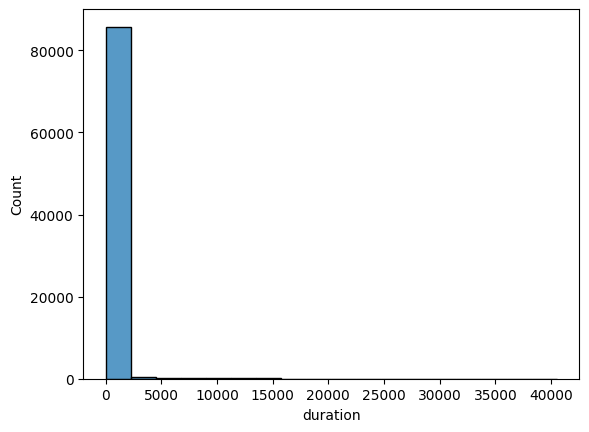

In [933]:
sns.histplot(df.duration)

In [934]:
encoder = LabelEncoder()
dfff.attack = encoder.fit_transform(dfff["attack"])

In [935]:
dfff.attack

0        0
1        1
2        1
3        1
4        0
        ..
86840    1
86841    1
86842    1
86843    1
86844    1
Name: attack, Length: 85192, dtype: int32

In [936]:
df.attack.value_counts()

attack
normal     53847
neptune    32998
Name: count, dtype: int64

In [937]:
dfff.attack.value_counts()

attack
1    52265
0    32927
Name: count, dtype: int64

In [938]:
categories

['protocoltype', 'service', 'flag', 'suattempted']

In [939]:
dffff = dfff.drop(['protocoltype', 'service', 'flag', 'suattempted', "hot", "dstbytes", "srcbytes", "duration", "numfilecreations", "numshells", "numaccessfiles", "srvcount", "srvdiffhostrate", "dsthostsamesrcportrate", "dsthostsrvdiffhostrate", "lastflag"], axis=1)
dfff = dfff.drop(["hot", "dstbytes", "srcbytes", "duration", "numfilecreations", "numshells", "numaccessfiles", "srvcount", "srvdiffhostrate", "dsthostsamesrcportrate", "dsthostsrvdiffhostrate", "lastflag"], axis=1)
dt = dt.drop(["hot", "dstbytes", "srcbytes", "duration", "numfilecreations", "numshells", "numaccessfiles", "srvcount", "srvdiffhostrate", "dsthostsamesrcportrate", "dsthostsrvdiffhostrate", "lastflag"], axis=1)

<Axes: >

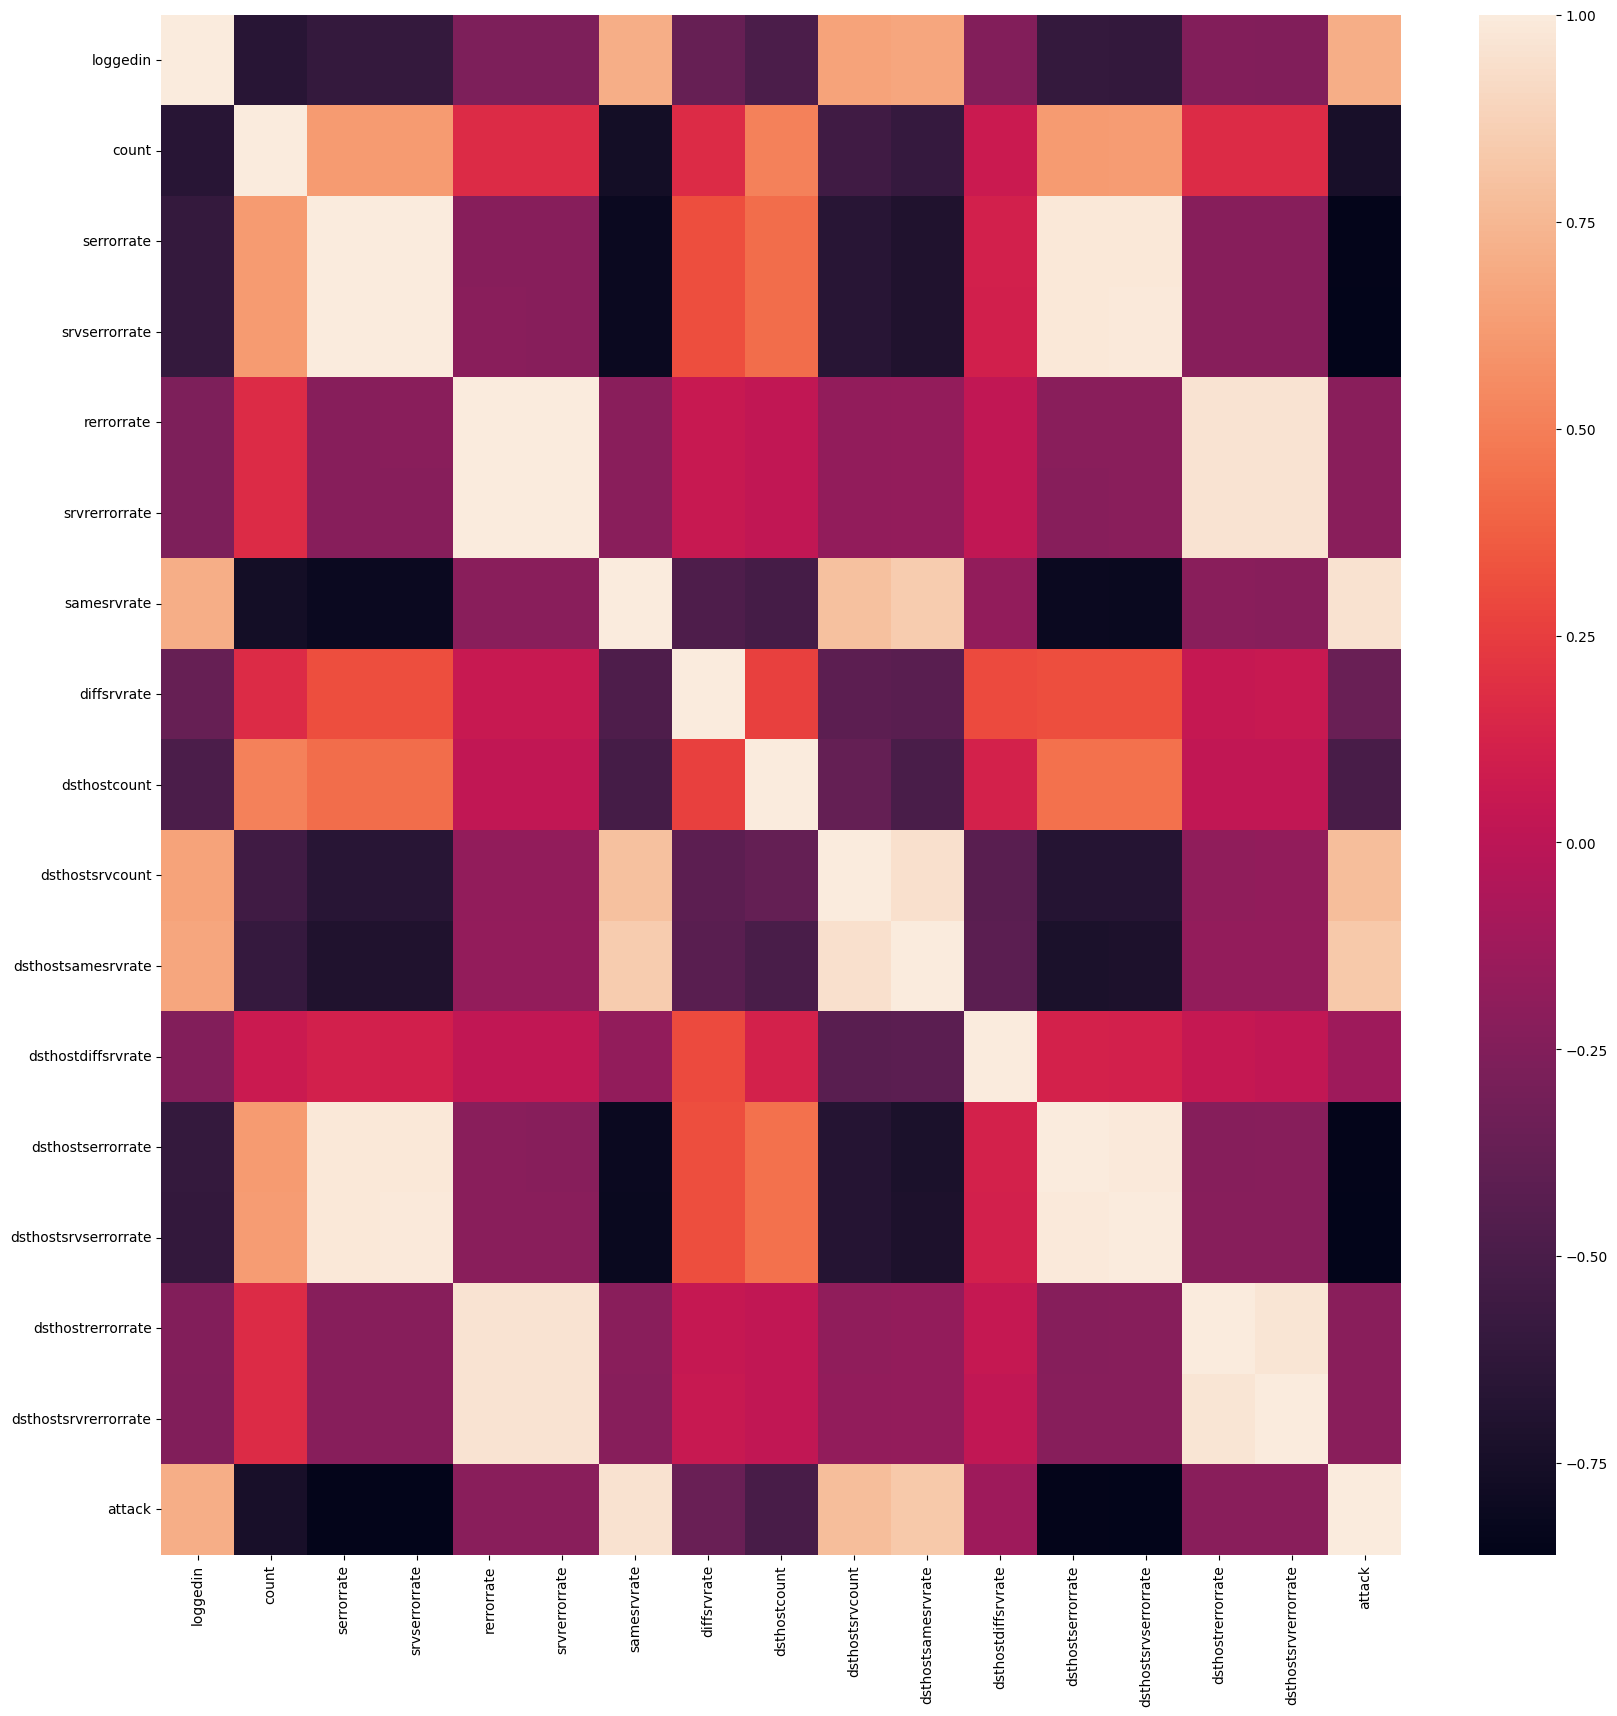

In [940]:
plt.figure(figsize=(20, 20))
sns.heatmap(dffff.corr())

In [941]:
dfff = pd.get_dummies(dfff, columns=['protocoltype', 'service', 'flag', 'suattempted'], dtype=int, drop_first=True)
dt = pd.get_dummies(dt, columns=['protocoltype', 'service', 'flag', 'suattempted'], dtype=int, drop_first=True)
dfff

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,dsthostcount,dsthostsrvcount,...,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,277,0.0,0.0,1.0,1.0,0.05,0.06,255,15,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,255,116,...,0,0,0,0,0,0,1,0,0,0
2,1,21,0.0,0.0,0.0,0.0,1.00,0.00,57,255,...,0,0,0,0,0,0,1,0,0,0
3,1,4,0.0,0.0,0.0,0.0,1.00,0.00,255,255,...,0,0,0,0,0,0,1,0,0,0
4,0,256,0.0,0.0,1.0,1.0,0.01,0.06,255,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,1,2,0.0,0.0,0.0,0.0,1.00,0.00,106,116,...,0,0,0,0,0,0,1,0,0,0
86841,1,19,0.0,0.0,0.0,0.0,1.00,0.00,39,178,...,0,0,0,0,0,0,1,0,0,0
86842,1,1,0.0,0.0,0.0,0.0,1.00,0.00,148,42,...,0,0,0,0,0,0,1,0,0,0
86843,1,1,0.0,0.0,0.0,0.0,1.00,0.00,255,41,...,0,0,0,0,0,0,1,0,0,0


In [942]:
dfff.columns

Index(['loggedin', 'count', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'dsthostcount',
       'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate',
       'dsthostsrvrerrorrate', 'attack', 'protocoltype_tcp',
       'protocoltype_udp', 'service_X11', 'service_Z39_50', 'service_auth',
       'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf',
       'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_hostnames',
       'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap',
       'service_klogin', 'service_kshell', 'service_ldap', 'service_link',
       'service_login', 'service_mtp', 'service_name', 'service_netbi

In [943]:
dt.columns

Index(['loggedin', 'count', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'dsthostcount',
       'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate',
       'dsthostsrvrerrorrate', 'protocoltype_tcp', 'protocoltype_udp',
       'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_hostnames', 'service_http', 'service_http_443',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', '

In [944]:
dfff = dfff.drop("service_tftp_u", axis=1)

In [945]:
dfff

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,dsthostcount,dsthostsrvcount,...,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,277,0.0,0.0,1.0,1.0,0.05,0.06,255,15,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,255,116,...,0,0,0,0,0,0,1,0,0,0
2,1,21,0.0,0.0,0.0,0.0,1.00,0.00,57,255,...,0,0,0,0,0,0,1,0,0,0
3,1,4,0.0,0.0,0.0,0.0,1.00,0.00,255,255,...,0,0,0,0,0,0,1,0,0,0
4,0,256,0.0,0.0,1.0,1.0,0.01,0.06,255,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,1,2,0.0,0.0,0.0,0.0,1.00,0.00,106,116,...,0,0,0,0,0,0,1,0,0,0
86841,1,19,0.0,0.0,0.0,0.0,1.00,0.00,39,178,...,0,0,0,0,0,0,1,0,0,0
86842,1,1,0.0,0.0,0.0,0.0,1.00,0.00,148,42,...,0,0,0,0,0,0,1,0,0,0
86843,1,1,0.0,0.0,0.0,0.0,1.00,0.00,255,41,...,0,0,0,0,0,0,1,0,0,0


In [946]:
dt

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,dsthostcount,dsthostsrvcount,...,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,249,0.0,0.0,1.0,1.0,0.03,0.07,255,7,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0.0,0.0,0.0,0.0,1.00,0.00,255,255,...,0,0,0,0,0,0,1,0,0,0
2,0,16,1.0,1.0,0.0,0.0,0.38,0.38,255,14,...,0,0,1,0,0,0,0,0,0,0
3,0,297,1.0,1.0,0.0,0.0,0.03,0.05,255,2,...,0,0,1,0,0,0,0,0,0,0
4,0,104,1.0,1.0,0.0,0.0,0.18,0.06,255,16,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21707,1,12,0.0,0.0,0.0,0.0,1.00,0.00,33,255,...,0,0,0,0,0,0,1,0,0,0
21708,0,126,0.0,0.0,0.0,0.0,1.00,0.00,255,255,...,0,0,0,0,0,0,1,0,0,0
21709,0,280,1.0,1.0,0.0,0.0,0.04,0.06,255,10,...,0,0,1,0,0,0,0,0,0,0
21710,0,1,0.0,0.0,0.0,0.0,1.00,0.00,86,45,...,0,0,0,0,0,0,1,0,0,0


In [947]:
scaler = MinMaxScaler()
scaler.fit(dfff)
scaler.fit(dt)
dfff

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,dsthostcount,dsthostsrvcount,...,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,277,0.0,0.0,1.0,1.0,0.05,0.06,255,15,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,255,116,...,0,0,0,0,0,0,1,0,0,0
2,1,21,0.0,0.0,0.0,0.0,1.00,0.00,57,255,...,0,0,0,0,0,0,1,0,0,0
3,1,4,0.0,0.0,0.0,0.0,1.00,0.00,255,255,...,0,0,0,0,0,0,1,0,0,0
4,0,256,0.0,0.0,1.0,1.0,0.01,0.06,255,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,1,2,0.0,0.0,0.0,0.0,1.00,0.00,106,116,...,0,0,0,0,0,0,1,0,0,0
86841,1,19,0.0,0.0,0.0,0.0,1.00,0.00,39,178,...,0,0,0,0,0,0,1,0,0,0
86842,1,1,0.0,0.0,0.0,0.0,1.00,0.00,148,42,...,0,0,0,0,0,0,1,0,0,0
86843,1,1,0.0,0.0,0.0,0.0,1.00,0.00,255,41,...,0,0,0,0,0,0,1,0,0,0


In [948]:
dt

,loggedin,count,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,dsthostcount,dsthostsrvcount,...,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,suattempted_1,suattempted_2
0,0,249,0.0,0.0,1.0,1.0,0.03,0.07,255,7,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0.0,0.0,0.0,0.0,1.00,0.00,255,255,...,0,0,0,0,0,0,1,0,0,0
2,0,16,1.0,1.0,0.0,0.0,0.38,0.38,255,14,...,0,0,1,0,0,0,0,0,0,0
3,0,297,1.0,1.0,0.0,0.0,0.03,0.05,255,2,...,0,0,1,0,0,0,0,0,0,0
4,0,104,1.0,1.0,0.0,0.0,0.18,0.06,255,16,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21707,1,12,0.0,0.0,0.0,0.0,1.00,0.00,33,255,...,0,0,0,0,0,0,1,0,0,0
21708,0,126,0.0,0.0,0.0,0.0,1.00,0.00,255,255,...,0,0,0,0,0,0,1,0,0,0
21709,0,280,1.0,1.0,0.0,0.0,0.04,0.06,255,10,...,0,0,1,0,0,0,0,0,0,0
21710,0,1,0.0,0.0,0.0,0.0,1.00,0.00,86,45,...,0,0,0,0,0,0,1,0,0,0


In [949]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
clf = svm.SVC(kernel="linear")

In [950]:
'rerrorrate', 'srvrerrorrate', 'dsthostdiffsrvrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate'

('rerrorrate',
 'srvrerrorrate',
 'dsthostdiffsrvrate',
 'dsthostrerrorrate',
 'dsthostsrvrerrorrate')

In [951]:
x_train, x_test, y_train, y_test = train_test_split(dfff.drop("attack", axis=1), dfff["attack"], test_size=0.3, random_state=42)
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [952]:
prediction = clf.predict(x_test)

In [953]:
accuracy_score(y_test, prediction)

0.9998826199233117

In [954]:
f1_score(y_test, prediction)

0.999904921877476

In [957]:
pred = clf.predict(dt)

In [958]:
ds

,attack
0,normal
1,normal
2,normal
3,neptune
4,neptune
...,...
21707,normal
21708,neptune
21709,normal
21710,normal


In [959]:
pred = encoder.inverse_transform(pred)

In [960]:
ds["attack"] = pd.DataFrame(pred)

In [961]:
ds

,attack
0,neptune
1,normal
2,neptune
3,neptune
4,neptune
...,...
21707,normal
21708,normal
21709,neptune
21710,normal


In [962]:
oe = OrdinalEncoder(categories=[["normal", "neptune"]])
ds.attack = oe.fit_transform(ds[["attack"]])

In [963]:
ds.attack = ds.attack.astype(int)
ds

,attack
0,1
1,0
2,1
3,1
4,1
...,...
21707,0
21708,0
21709,1
21710,0


In [964]:
ds.to_csv("My_Submission2.csv", index=False)